In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt 

# Display Augmented Image

In [6]:
#function to display sample training image

def test_img(img: np.array):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')

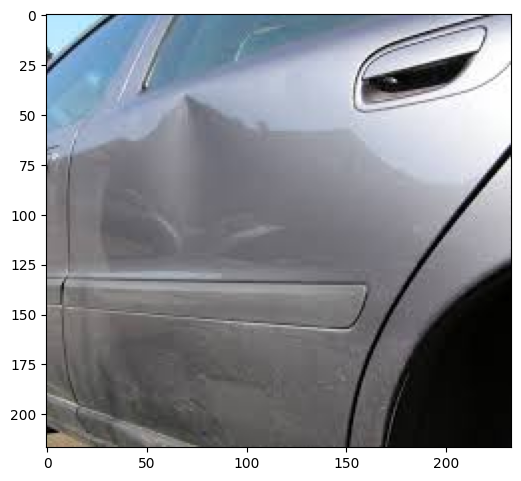

In [7]:
#function to import sample training image

img = plt.imread('data3a/training/01-minor/0001.JPEG')
img = np.array(img)
test_img(img=img)

In [8]:
#function to augment imported image


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [9]:
# Reshape the image to (1, height, width, channels) for the generator
img = np.expand_dims(img, axis=0)
# Generate augmented images
augmented_images = datagen.flow(img, batch_size=1)#batch_size 1 = augment the 1st image only to display
# Get the first augmented image
augmented_image = next(augmented_images)

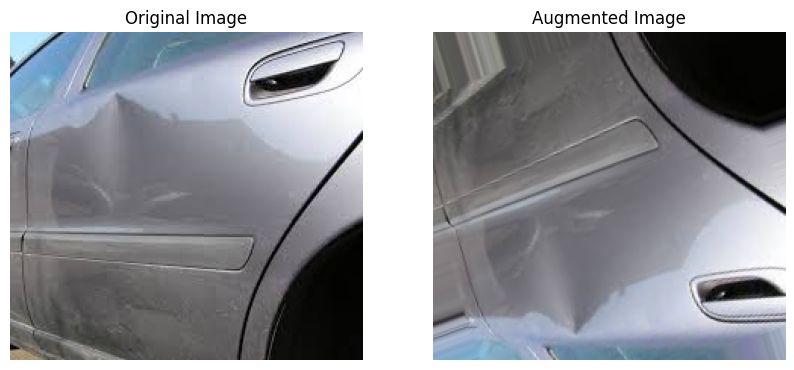

In [10]:
# Plot the original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(augmented_image[0])
plt.title("Augmented Image")
plt.axis("off")

plt.show()

# Display a Batch of Augmented Images

In [62]:
#batch visualizer

#load train and valid data dir, set img width and height, and set size of batches
train_dir = 'data3a/training'
val_dir = 'data3a/validation'
img_width, img_height = 150, 150
batch_size = 32

In [63]:
#image data generator to augment images 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [64]:


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1383 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


In [65]:
first_batch = train_generator.next()
first_batch[0].shape, first_batch[1].shape

((32, 150, 150, 3), (32, 3))

IndexError: index 5 is out of bounds for axis 0 with size 5

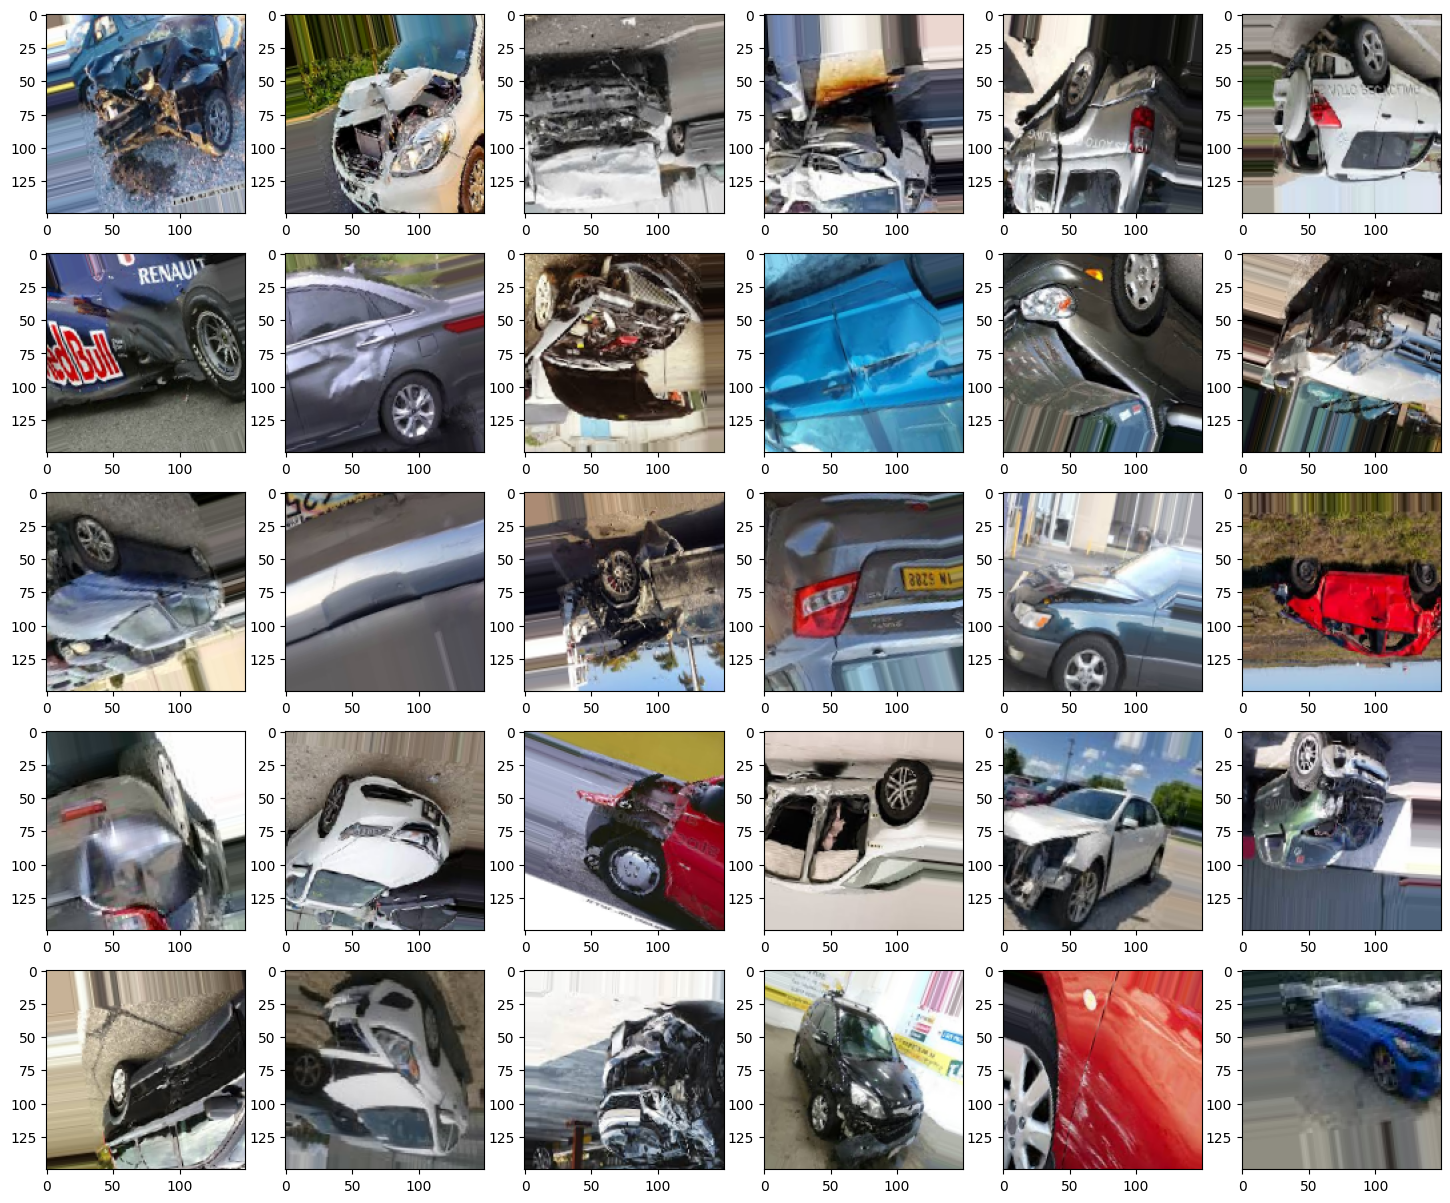

In [66]:
import math


def visualize_batch(batch):
    #adaptive row and columns based of num of batches
    n = batch_size
    num_row = int(math.sqrt(n))
    num_col = n // num_row
    
    fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col, 3*num_row))
    
    for i in range (n):
        img = np.array(batch[0][i]*255, dtype='uint8')
        ax = axes[i//num_col, i%num_col]
        ax.imshow(img)
    
    plt.tight_layout()
    plt.show()
    
visualize_batch(batch=first_batch)